In [1]:
import numpy as np

# Getting Matrix Values
pairCSV  = np.genfromtxt("series.csv", skip_header=1, delimiter=",", dtype=float)
pairCSVt = pairCSV.T

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(pairCSVt.astype(int))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12]
 [   5    9   13   17   21   25   29   33   37   41   45   49   53]
 [   5   12   25   44   69  100  137  180  229  284  345  412  485]
 [   5   14   41   98  197  350  569  866 1253 1742 2345 3074 3941]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
cols_all = ['xs', 'ys1', 'ys2', 'ys3']
cols_sel = ['ys1', 'ys2', 'ys3']

In [4]:
# Convert to pandas DataFrame
df = pd.DataFrame(pairCSV, columns=cols_all)

In [5]:
print(df)

      xs   ys1    ys2     ys3
0    0.0   5.0    5.0     5.0
1    1.0   9.0   12.0    14.0
2    2.0  13.0   25.0    41.0
3    3.0  17.0   44.0    98.0
4    4.0  21.0   69.0   197.0
5    5.0  25.0  100.0   350.0
6    6.0  29.0  137.0   569.0
7    7.0  33.0  180.0   866.0
8    8.0  37.0  229.0  1253.0
9    9.0  41.0  284.0  1742.0
10  10.0  45.0  345.0  2345.0
11  11.0  49.0  412.0  3074.0
12  12.0  53.0  485.0  3941.0


In [6]:
# Melt the DataFrame to long format for FacetGrid
df_melted = pd.melt(df,
  id_vars='xs', var_name='y', value_name='value')

In [7]:
print(df_melted.T)

        0    1     2     3     4     5     6     7     8     9   ...    29  \
xs     0.0  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  ...   3.0   
y      ys1  ys1   ys1   ys1   ys1   ys1   ys1   ys1   ys1   ys1  ...   ys3   
value  5.0  9.0  13.0  17.0  21.0  25.0  29.0  33.0  37.0  41.0  ...  98.0   

          30     31     32     33      34      35      36      37      38  
xs       4.0    5.0    6.0    7.0     8.0     9.0    10.0    11.0    12.0  
y        ys3    ys3    ys3    ys3     ys3     ys3     ys3     ys3     ys3  
value  197.0  350.0  569.0  866.0  1253.0  1742.0  2345.0  3074.0  3941.0  

[3 rows x 39 columns]


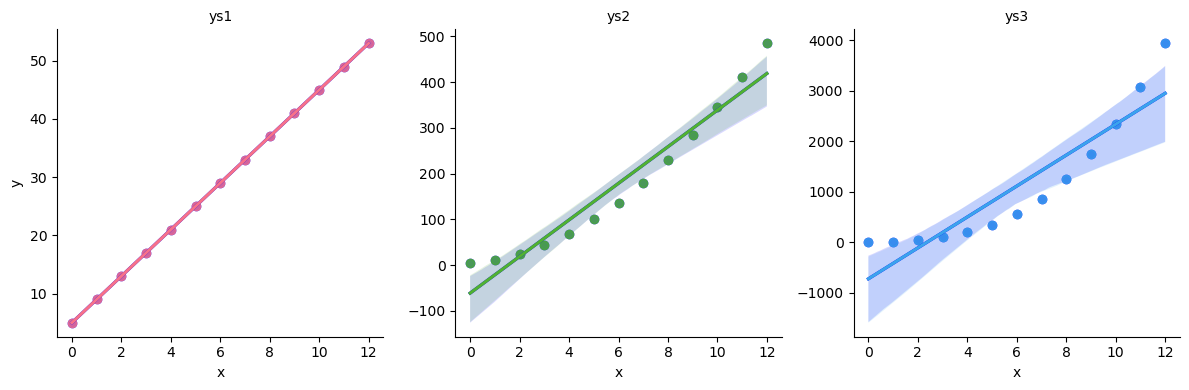

In [8]:
# Create a FacetGrid with one row and three columns
g = sns.FacetGrid(df_melted,
  col='y', col_wrap=3, height=4, sharey=False)

# Map regplot to each facet
g.map_dataframe(sns.regplot,
  x='xs', y='value', color='b')

# Add different colors for each ys category
for ax, ys_name in zip(g.axes.flat, cols_sel):
  df_subset = df_melted[
    df_melted['y'] == ys_name]
  
  # with different color for each ys
  color = sns.color_palette("husl", 3)[
    cols_sel.index(ys_name)]

  sns.regplot(x='xs', y='value',
    data=df_subset, ax=ax,
    color=color)

# Set titles for each facet
g.set_titles('{col_name}')

# Set common labels for x-axis and y-axis
g.set_axis_labels('x', 'y')